### List of crypto currency

In [280]:
## Meta info for cryptos
import urllib.request
api_key='************'
url = f'https://api.lunarcrush.com/v2?data=meta&key={api_key}'
response=urllib.request.urlopen(url).read()
global_data=json.loads(response)
crypto_meta=pd.DataFrame(global_data.get('data'))
print(f'Number of crypto currencies in market is {crypto_meta.shape[0]}')
crypto_meta.head(20)

Number of crypto currencies in market is 2836


,id,name,symbol
0,1,Bitcoin,BTC
1,2,Ethereum,ETH
2,3,XRP,XRP
3,4,Litecoin,LTC
4,5,Bitcoin Cash,BCH
5,6,Binance Coin,BNB
6,7,Tether,USDT
7,8,EOS,EOS
8,9,Bitcoin SV,BSV
9,10,Stellar,XLM


In [270]:
list_of_currencies=['BTC', 'ETH', 'BNB', 'ADA', 'XRP', 'DOGE', 'DOT']
crypto_meta=crypto_meta[crypto_meta.symbol.isin(list_of_currencies)]
crypto_meta

,id,name,symbol
0,1,Bitcoin,BTC
1,2,Ethereum,ETH
2,3,XRP,XRP
5,6,Binance Coin,BNB
10,11,Cardano,ADA
28,29,Dogecoin,DOGE
1918,2780,Polkadot,DOT


### Crypto data collection

In [281]:
## Use LUNA to get data
import urllib.request
import json
coin='DOGE'#crypto_meta['symbol'][9]
#data points can be extend to 720
url=f'https://api.lunarcrush.com/v2?data=assets&key={api_key}&symbol={coin}&interval=day&data_points=720'
response=urllib.request.urlopen(url).read()
json_data=json.loads(response)

In [282]:
print(f'Data is collected for {coin}')

Data is collected for DOGE


### Crypto coin overview

In [283]:
json_data['data'][0].items()#get('id')
overal_stat_keys=['id','name',',symbol','price','price_btc','market_cap','percent_change_24h','percent_change_7d',
             'percent_change_30d','volume_24h','max_supply']
overview=pd.DataFrame()
for k, v in json_data['data'][0].items():
    if k in overal_stat_keys:
        overview=overview.append(pd.DataFrame([v],index=[k]))
overview.transpose()

,id,name,price,price_btc,market_cap,percent_change_24h,percent_change_7d,percent_change_30d,volume_24h,max_supply
0,29,Dogecoin,0.270055,5.96996e-06,35334242009,-1.5,31.88,36.19,5.88485e+09,


### Social response and current information

In [284]:
additional_summary=pd.DataFrame()
for k, v in json_data['data'][0].items():
    if (k not in overal_stat_keys) and k!='timeSeries':
        #print(k,v)
        additional_summary=additional_summary.append(pd.DataFrame([v], index=[k]))

additional_summary#.transpose()

,0
symbol,DOGE
social_dominance_calc_24h_previous,0
social_contributors_calc_24h_previous,44807
url_shares_calc_24h_previous,9204
tweet_spam_calc_24h_previous,43015
...,...
alt_rank_hour_average,91.21
youtube,3
medium,3
tags,meme


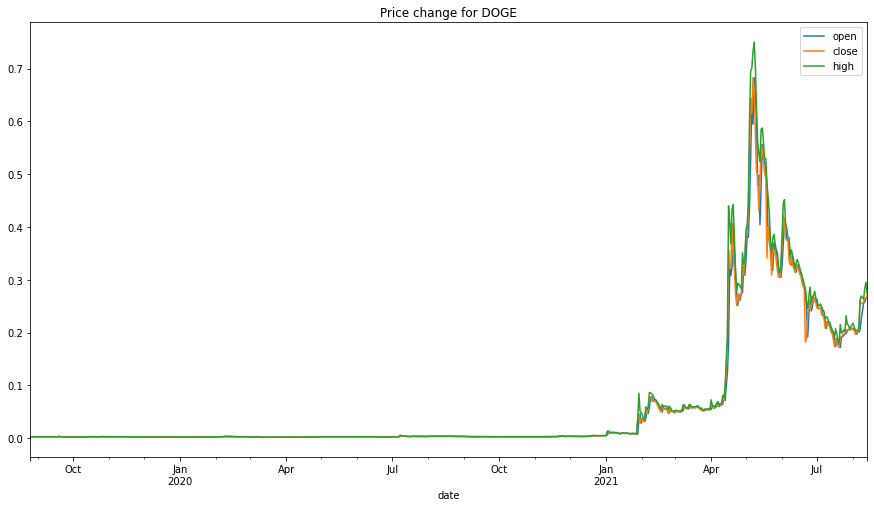

In [285]:
import pandas as pd
import datetime
BTC_history=pd.DataFrame(json_data['data'][0]['timeSeries'])
#for k in (json_data['data'][0]['timeSeries']):
#    BTC_history=BTC_history.append(pd.DataFrame([k]))
BTC_history['date']=BTC_history['time'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))
BTC_history.index=pd.DatetimeIndex(BTC_history['date'])
BTC_history.drop(columns=['asset_id', 'time', 'date'], inplace=True)

%matplotlib inline
#plt.figure(figsize=[15,8])
BTC_history[['open', 'close',  'high']].plot(figsize=[15,8])

plt.title(f'Price change for {coin}')
plt.show()

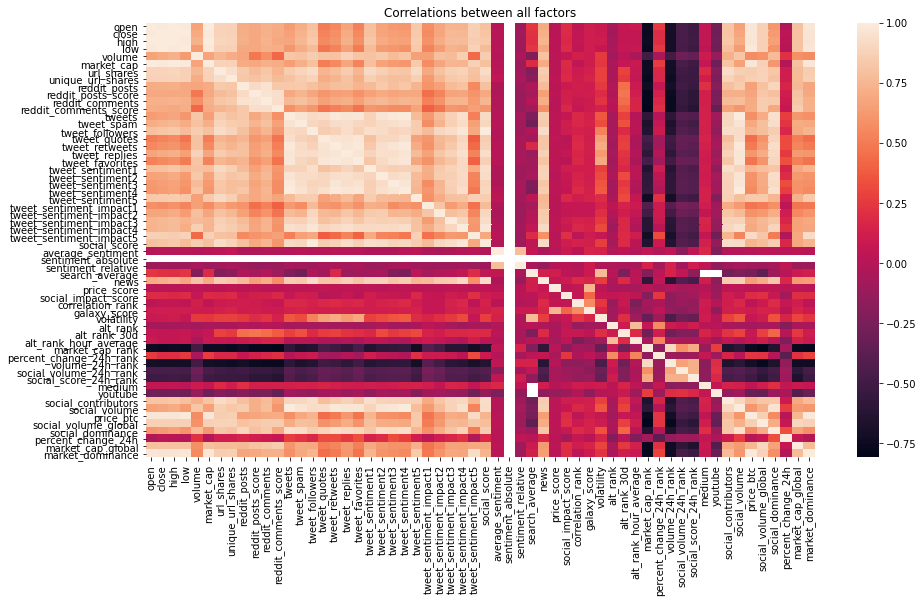

In [286]:
corr
# calculate the correlation matrix
corr = BTC_history.corr()
plt.figure(figsize=[15,8])
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title('Correlations between all factors')
plt.show()

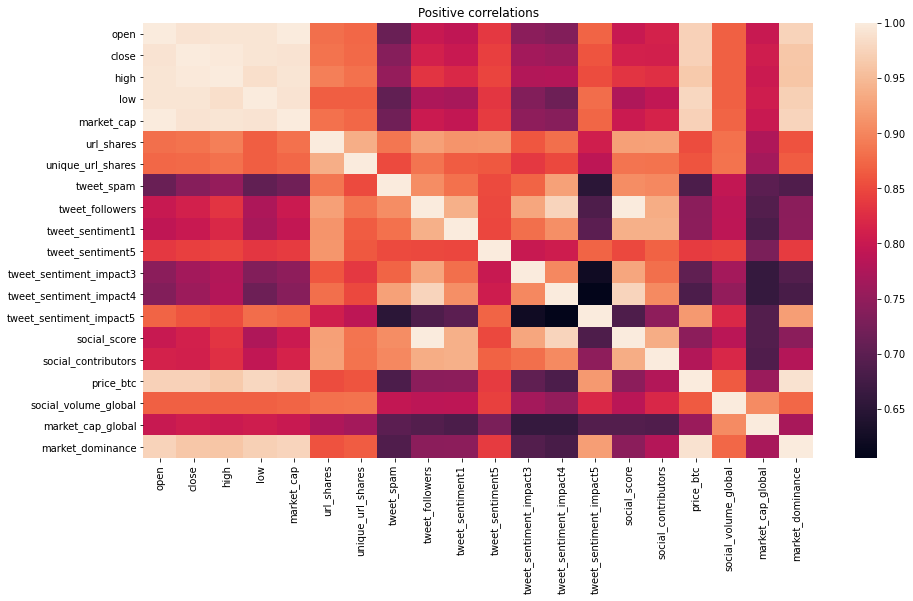

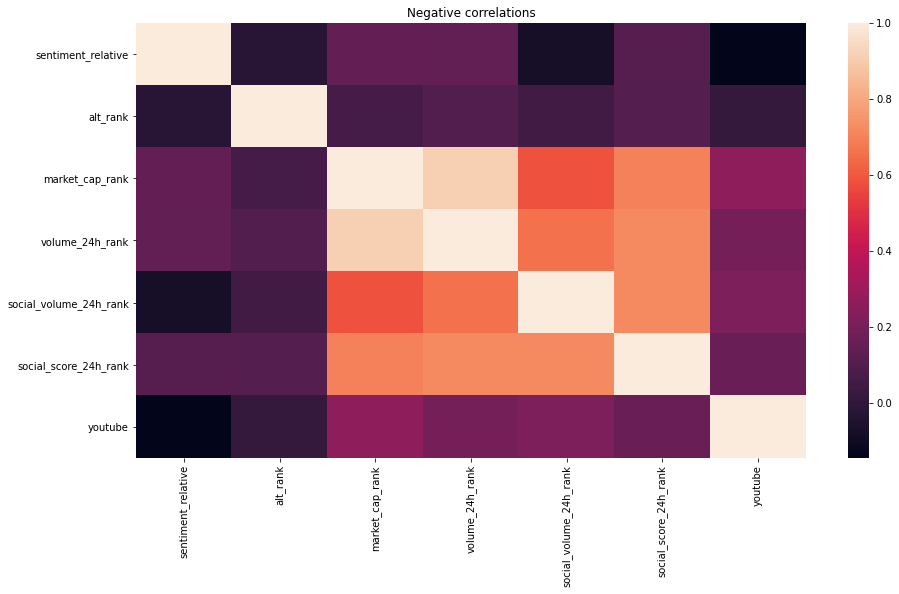

In [287]:

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


#Get strong positive correlations
pos_corr=corr[corr['high']>0.75][corr[corr['high']>0.75].index.values]

#Get strong negative correlations
neg_corr=corr[corr['high']<(-0.0)][corr[corr['high']<(-0.0)].index.values]

# plot the heatmap
plt.figure(figsize=[15,8])
sns.heatmap(pos_corr, 
        xticklabels=pos_corr.columns,
        yticklabels=pos_corr.columns)
plt.title('Positive correlations')
plt.show()
plt.figure(figsize=[15,8])
sns.heatmap(neg_corr, 
        xticklabels=neg_corr.columns,
        yticklabels=neg_corr.columns)
plt.title('Negative correlations')
plt.show()

Text(0.5, 1.0, 'Positive correlation factors in log scale')

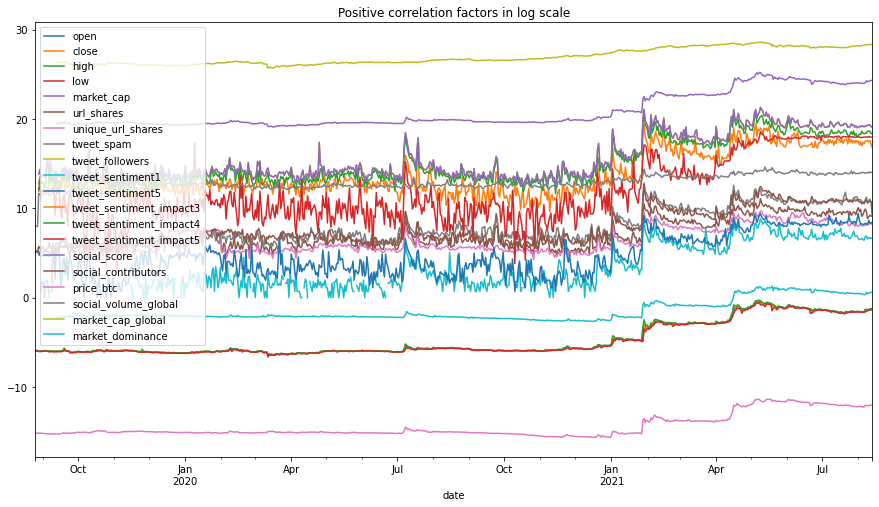

In [288]:
import numpy as np
BTC_history[pos_corr.columns].apply(np.log).plot(figsize=[15,8])
plt.title('Positive correlation factors in log scale')

In [289]:
coin
BTC_history.to_csv('data/'+coin+'_histical_data.csv')

### Use Market data


In [192]:
## Market aPI test
import urllib.request
url = f'https://api.lunarcrush.com/v2?data=market&key={api_key}'
response=urllib.request.urlopen(url).read()
market_data=json.loads(response)

In [200]:
coin

'XLM'

In [205]:
len(market_data['data'])
#crypto_meta.shape[0]#[0].keys()
for md in market_data['data']:
    if md['s']==coin:
        print(md)

{'id': 10, 's': 'XLM', 'n': 'Stellar', 'p': 0.25236846, 'p_btc': 7.839892211901e-06, 'v': 877782893.61, 'vt': 0.05498675897669072, 'pc': -5.69, 'pch': -0.15, 'mc': 5891477799, 'gs': 59.5, 'ss': 4583365, 'as': 3.720833333333333, 'bl': 1552, 'br': 159, 'sp': 1309, 'na': 1, 'md': 0, 't': 1945, 'r': 63, 'yt': 0, 'sv': 2156, 'u': 336, 'c': 109, 'sd': 0.20873493892519038, 'd': 0.4120263384071318, 'cr': 1.9, 'acr': 196, 'timeSeries': [{'p': 0.25931245, 'ss': 54399, 'na': 0, 'ts': 93, 'sv': 80, 'u': 14}, {'p': 0.2620464, 'ss': 75862, 'na': 0, 'ts': 73, 'sv': 56, 'u': 18}, {'p': 0.25944234, 'ss': 204150, 'na': 0, 'ts': 57, 'sv': 105, 'u': 13}, {'p': 0.25540742, 'ss': 699633, 'na': 0, 'ts': 57, 'sv': 121, 'u': 6}, {'p': 0.25223234, 'ss': 127112, 'na': 0, 'ts': 80, 'sv': 82, 'u': 17}, {'p': 0.25244689, 'ss': 905089, 'na': 0, 'ts': 54, 'sv': 58, 'u': 16}]}


### Exchange platform stats

In [206]:
## Exchanges info for cryptos
import urllib.request
url = f'https://api.lunarcrush.com/v2?data=exchanges&key={api_key}'
response=urllib.request.urlopen(url).read()
exchange_data=json.loads(response)
exchange_df=pd.DataFrame(exchange_data['data']['exchanges'])

In [207]:
print(f'Number of crypto exchanges in market is {exchange_df.shape[0]}')
exchange_df.head()

Number of crypto exchanges in market is 454


,id,name,lunar_id,num_pairs,1d_volume,30d_volume,1d_trades,30d_trades,last_updated,rank,logo,1d_volume_percent,30d_volume_percent,1d_trades_percent,30d_trades_percent
0,32,Binance,binance,1681,2.758154e+10,9.568016e+11,38735288,1136646750,1627062062,1,https://dkhpfm5hits1w.cloudfront.net/exchanges...,11.972307,9.466865,57.564619,56.483741
1,121,Coinbase Pro,coinbase-pro,205,9.780241e+09,2.365203e+11,8082998,211788255,1621948784,2,https://dkhpfm5hits1w.cloudfront.net/exchanges...,4.245305,2.340199,12.012166,10.524460
2,359,OKEx,okex,14496,8.375125e+09,2.878917e+11,0,0,1627062062,3,https://dkhpfm5hits1w.cloudfront.net/exchanges...,3.635387,2.848481,0.000000,0.000000
3,167,FTX,ftx,1514,5.799457e+09,2.133168e+11,4243412,127385074,1627062062,4,https://dkhpfm5hits1w.cloudfront.net/exchanges...,2.517368,2.110617,6.306146,6.330186
4,208,Huobi Global,huobi-global,1191,4.521015e+09,2.024324e+11,0,0,1627062062,5,https://dkhpfm5hits1w.cloudfront.net/exchanges...,1.962435,2.002923,0.000000,0.000000


### Feeds in social platforms

In [255]:
## Crypto social aspect
coin2='LTC'
url = f'https://api.lunarcrush.com/v2?data=feeds&key={api_key}&symbol={coin}&limit=10000'
response=urllib.request.urlopen(url).read()
feeds_data=json.loads(response)
feeds_df=pd.DataFrame(feeds_data['data'])
feeds_df['date']=feeds_df['time'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))
feeds_df.sort_values('date').tail()

HTTPError: HTTP Error 502: Bad Gateway

In [254]:
feeds_df.sort_values('retweets', ascending=False)['body'][0]#.head()
feeds_df.sort_values('retweets', ascending=False).head()['body'].values[0]#[0]
coin
feeds_df.sort_values('date').head()
feeds_df.date.max()

Timestamp('2021-07-23 15:02:20')

'EGLD'

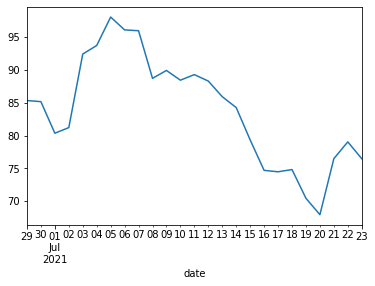

In [244]:
BTC_history.tail(25)['close'].plot()#[BTC_history.datetime=='2021-07-23']
coin

In [224]:
print('Coin feeds')
feeds_df.name.unique()
feeds_df[feeds_df.symbol==coin]#['body'].values
#np.sort(feeds_df.date.unique())

Coin feeds


,lunar_id,asset_id,symbol,name,time,social_score,type,id,body,sentiment,commented,likes,retweets,url,display_name,twitter_screen_name,profile_image,title,description,image,thumbnail,average_sentiment,publisher,shares,subreddit,link,date


In [211]:
## Crypto social aspect. Influencers per crypto
crypto=coin
url = f'https://api.lunarcrush.com/v2?data=influencers&key={api_key}&symbol={crypto}&days=30&num_days=1&limit=100'
response=urllib.request.urlopen(url).read()
influence_data=json.loads(response)
influence_df=pd.DataFrame(influence_data['data'])
influence_df['date']=feeds_df['time'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))
influence_df.sort_values('date').tail()

,medium,identifier,volume,followers,engagement,verified,twitter_screen_name,display_name,following,profile_image,banner_image,volume_rank,followers_rank,engagement_rank,influencer_rank_average,influencer_rank,date
1,twitter,898598533938290688,6,4866,3,0,samconnerone,Sam Conner the Stellar Lumenaut #XLM,572,https://pbs.twimg.com/profile_images/136454426...,https://pbs.twimg.com/profile_banners/89859853...,1,5,4,4.666667,None,2021-06-25 02:10:31
2,twitter,119311017,2,631,7,0,nikhilsaraf9,Nikhil Saraf,1071,https://pbs.twimg.com/profile_images/132732626...,https://pbs.twimg.com/profile_banners/11931101...,4,7,2,5.000000,None,2021-06-25 02:11:52
0,twitter,953559767242498049,2,35244,13,0,Utoday_en,U.Today,4447,https://pbs.twimg.com/profile_images/135009345...,https://pbs.twimg.com/profile_banners/95355976...,5,1,1,2.666667,None,2021-07-02 10:28:55
4,twitter,1125792241958703104,2,15246,2,0,answerlyapp,Answerly,1366,https://pbs.twimg.com/profile_images/135489596...,https://pbs.twimg.com/profile_banners/11257922...,3,2,6,5.666667,None,2021-07-03 07:09:49
3,twitter,3312028795,2,8871,4,0,AskUphold,AskUphold,8,https://pbs.twimg.com/profile_images/107007959...,https://pbs.twimg.com/profile_banners/33120287...,6,4,3,5.333333,None,2021-07-16 17:12:56
